# Simplest ETU3 model

3 _ \
2 _ \
1 _ _ b \
0 _ _ a\
...A S...

## Study of the population density and lifetimes  

$P_{avg} = P_{peak} \cdot \frac{\Delta t}{T}$

Studies: 
$P_{avg} = 0.5 W/cm^2$

+ $P_{peak} = 1 W/cm^2$, $T = 0.02$ s


In [2]:
%matplotlib notebook
import matplotlib.pyplot as pl
import numpy as np
from scipy import constants
from sympy import init_session, solve, lambdify, Symbol, symbols, Eq
from sympy.physics.mechanics import dynamicsymbols
import sys
sys.path.append('../scripts/')
sys.path.append('../utils/')
from virtualab import Sample, Laser, Experiment
import utils

## Load experiments

In [3]:
experiment = Experiment()

In [4]:
experiment.load('pulse_study_etu3_Pavg_duty_cnt_T_002')

## Population of the states - Dynamics

<IPython.core.display.Javascript object>


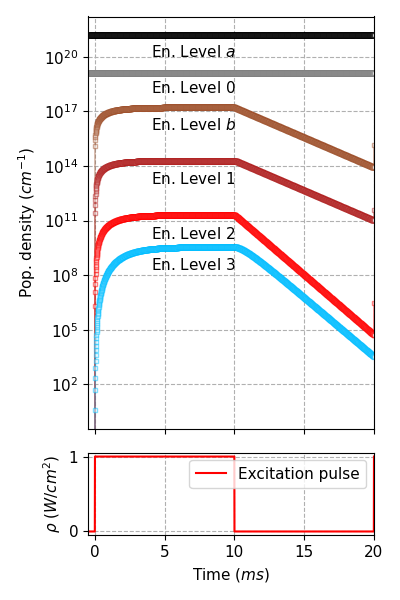

In [4]:
pl.rcParams.update({'font.size': 11})

fig, axs = pl.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [5, 1]}, figsize=(4, 6))

T = experiment.laser.period / 2
time = 1000 * (experiment.sample.data['t'] - T)
timeText = (0.014 - T) * 1000

axs[0].semilogy(time, experiment.sample.data['N_a'], '-s', color='k', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $a$')
axs[0].text(timeText, 1e20, 'En. Level $a$')
axs[0].semilogy(time, experiment.sample.data['N_0'], '-s', color='gray', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $0$')
axs[0].text(timeText, 1e18, 'En. Level $0$')

axs[0].semilogy(time, experiment.sample.data['N_b'], '-s', color='sienna', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $b$')
axs[0].text(timeText, 1e16, 'En. Level $b$')

axs[0].semilogy(time, experiment.sample.data['N_1'], '-s', color='firebrick', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $1$')
axs[0].text(timeText, 1e13, 'En. Level $1$')

axs[0].semilogy(time, experiment.sample.data['N_2'], '-s', color='red', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $2$')
axs[0].text(timeText, 1e10, 'En. Level $2$')

axs[0].semilogy(time, experiment.sample.data['N_3'], '-s', color='deepskyblue', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $3$')
axs[0].text(timeText, 2e8, 'En. Level $3$')
axs[0].grid(linestyle='--', linewidth=0.8)
# axs[0].legend()

axs[0].set_ylabel('Pop. density $(cm^{-3})$')

axs[1].plot(time, experiment.sample.data['power'], '-', color='red', lw=1.5, label='Excitation pulse')
axs[1].set_xlabel('Time $(ms)$')
axs[1].set_ylabel(r'$\rho$ $(W/cm^2)$')
axs[1].grid(linestyle='--', linewidth=0.8)
axs[1].legend()



pl.xlim([-0.5, 20])
pl.tight_layout()

<IPython.core.display.Javascript object>


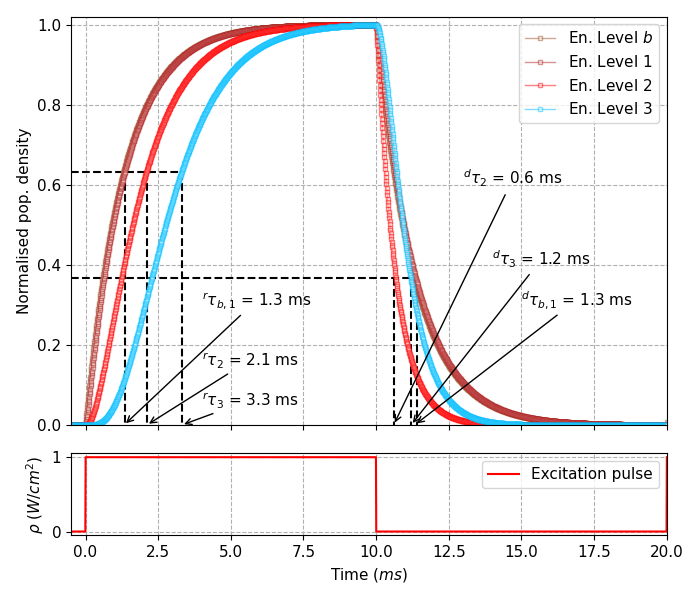

In [5]:
pl.rcParams.update({'font.size': 11})

fig, axs = pl.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [5, 1]}, figsize=(7, 6))

T = experiment.laser.period / 2
time = 1000 * (experiment.sample.data['t'] - T)
timeText = (0.014 - T) * 1000

arrowProps = dict(facecolor ='k', arrowstyle = "->")

# raise time
axs[0].plot([-0.5, 3.32], [1-np.exp(-1), 1-np.exp(-1)], 'k--')

axs[0].plot([3.32, 3.32], [1-np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^r\tau_3$ = 3.3 ms', xy=(3.3, 0), xytext=(4, 0.05), arrowprops = arrowProps)
axs[0].plot([2.11, 2.11], [1-np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^r\tau_2$ = 2.1 ms', xy=(2.1, 0), xytext=(4, 0.15), arrowprops = arrowProps)
axs[0].plot([1.36, 1.36], [1-np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^r\tau_{b,1}$ = 1.3 ms', xy=(1.32, 0), xytext=(4, 0.3), arrowprops = arrowProps)

# decay time
axs[0].plot([-0.5, 11.41], [np.exp(-1), np.exp(-1)], 'k--')

axs[0].plot([10.6, 10.6], [np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^d\tau_2$ = 0.6 ms', xy=(10.6, 0), xytext=(13, 0.6), arrowprops = arrowProps)
axs[0].plot([11.2, 11.2], [np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^d\tau_3$ = 1.2 ms', xy=(11.2, 0), xytext=(14, 0.4), arrowprops = arrowProps)
axs[0].plot([11.4, 11.4], [np.exp(-1), -1], 'k--')
axs[0].annotate(r'$^d\tau_{b,1}$ = 1.3 ms', xy=(11.32, 0), xytext=(15, 0.3), arrowprops = arrowProps)


axs[0].plot(time, experiment.sample.data['N_b'] / experiment.sample.data['N_b'].max(), '-s', color='sienna', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $b$')
# axs[0].text(timeText, 1e16, 'En. Level $b$')

axs[0].plot(time, experiment.sample.data['N_1'] / experiment.sample.data['N_1'].max(), '-s', color='firebrick', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $1$')
# axs[0].text(timeText, 1e13, 'En. Level $1$')

axs[0].plot(time, experiment.sample.data['N_2'] / experiment.sample.data['N_2'].max(), '-s', color='red', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $2$')
# axs[0].text(timeText, 1e10, 'En. Level $2$')

axs[0].plot(time, experiment.sample.data['N_3'] / experiment.sample.data['N_3'].max(), '-s', color='deepskyblue', ms=3, mfc='w', alpha=.5, lw=1, label='En. Level $3$')
# axs[0].text(timeText, 2e8, 'En. Level $3$')


axs[0].grid(linestyle='--', linewidth=0.8)
axs[0].legend()

axs[0].set_ylabel('Normalised pop. density')

axs[1].plot(time, experiment.sample.data['power'], '-', color='red', lw=1.5, label='Excitation pulse')
axs[1].set_xlabel('Time $(ms)$')
axs[1].set_ylabel(r'$\rho$ $(W/cm^2)$')
axs[1].grid(linestyle='--', linewidth=0.8)
axs[1].legend()

pl.xlim([-0.5, 20])
axs[0].set_ylim([0, 1.02])
pl.tight_layout()

## Steady states

In [5]:
experiment.sample.props

{'N_sens': 1.5322875172623467e+21,
 'N_act': 1.276906264385289e+19,
 'W_0': 1.6e-18,
 'W_1': 6.2e-16,
 'W_2': 1.52e-16,
 'R_{ba}': 757.5757575757576,
 'R_{10}': 17241.379310344826,
 'R_{20}': 99999.99999999999,
 'R_30': 1481.4814814814813,
 'sigma_ab': 1.69e-20,
 'h': 6.62607015e-34,
 'nu': 307164403688524.56}

In [377]:
Ns = experiment.sample.props['N_sens']
N0 = experiment.sample.props['N_act'] 
W0 = experiment.sample.props['W_0']
# W1 = experiment.sample.props['W_1']
# W2 = experiment.sample.props['W_2']
Rb = experiment.sample.props['R_{ba}']
R1 = experiment.sample.props['R_{10}']
# R1 = 1 / 12e-3
R2 = experiment.sample.props['R_{20}']
# R2 = 1 / 2e-6

R3 = experiment.sample.props['R_30']
sigma =  experiment.sample.props['sigma_ab']
h = experiment.sample.props['h']
nu = experiment.sample.props['nu']

alpha = sigma / (h * nu)
W1 = R1 * Rb / (alpha * Ns * 40)
W2 = R2 * Rb / (alpha * Ns * 50)




def rhoi(i):
    Ri = (R1, R2)
    Wi = (W1, W2)
    return(
        Ri[i-1] * Rb / (Wi[i-1] * Ns * alpha)
    )


In [354]:
W2

1.1908471206201752e-14

In [355]:
W1

2.5664808634055505e-15

In [308]:
# Model 2: Ns

def Nb(rho):
    return(Ns * rho / (rho + Rb / alpha))

def Na(rho):
    return(Ns - Nb(rho))

def N1(rho):
    n1 = N0 * W0 * rho / (W1 * (rho * (1 + R1 / (W1 * Ns)) + rhoi(1)))
    return n1
    
def N2(rho):
    n2 = W1 * rho * N1(rho) / ( W2 * (rho * (1 + R2 / (W2 * Ns)) + rhoi(2)) )
#     n2 = N0 * rho * W0 * W1 / ( W1 * (rho + rhoi(1)) * W2 * (rho + rhoi(2)) )
    return n2

def N3(rho):
    n3 = W2 * Nb(rho) * N2(rho) / R3
    return n3

<IPython.core.display.Javascript object>


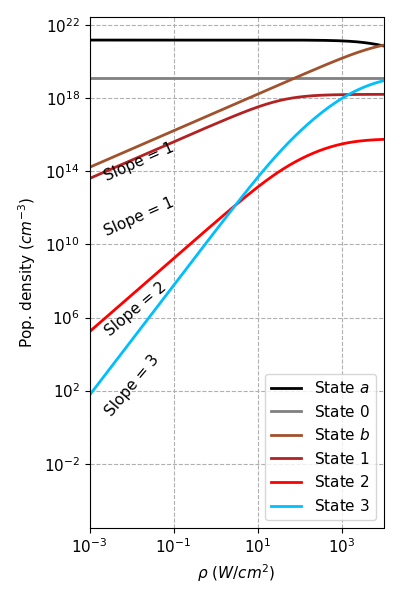

In [309]:
power = np.logspace(-5, 4, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(4, 6))

ax.plot(power, Na(power), color='k', lw=2, label='State $a$')
ax.plot([1e-5, 10**4], [N0, N0], color='gray', lw=2, label='State $0$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.loglog(power, Nb(power), color='sienna', lw=2, label='State $b$')
ax.text(2e-3, 3e13, 'Slope = 1', rotation=24)

ax.loglog(power, N1(power), color='firebrick', lw=2, label='State $1$')
ax.text(2e-3, 3e10, 'Slope = 1', rotation=24)

ax.loglog(power, N2(power), color='red', lw=2, label='State $2$')
ax.text(2e-3, 1e5, 'Slope = 2', rotation=40)

ax.loglog(power, N3(power), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 4, 'Slope = 3', rotation=50)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('Pop. density $(cm^{-3})$')
ax.set_xlim([1e-3, 10**4])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [195]:
# Model 1: Na~Ns

def Nb(rho):
    return(alpha * Ns * rho / Rb)

def N1(rho):
    n1 = N0 * W0 * rho / (W1 * (rho + rhoi(1)))
    return n1
    
def N2(rho):
    n2 = W1 * rho * N1(rho) / ( W2 * (rho + rhoi(2)) )
#     n2 = N0 * rho * W0 * W1 / ( W1 * (rho + rhoi(1)) * W2 * (rho + rhoi(2)) )
    return n2

def N3(rho):
    n3 = W2 * Nb(rho) * N2(rho) / R3
    return n3

In [196]:
ax.plot([1e-5, 10**3.5], [Na, Na], color='k', ls='--', lw=2, label='State $a$')
ax.plot([1e-5, 10**3.5], [N0, N0], color='gray', ls='--', lw=2, label='State $0$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.plot(power, Nb(power), color='sienna', ls='--', lw=2, label='State $b$')
ax.plot(power, N1(power), color='firebrick', ls='--', lw=2, label='State $1$')
ax.plot(power, N2(power), color='red', ls='--', lw=2, label='State $2$')
ax.plot(power, N3(power), color='deepskyblue', ls='--', lw=2, label='State $3$')



## Quantum Yield

In [310]:
def iQY(rho, lv):
    Ni = [N1, N2, N3]
    i = lv - 1
    qy = Ni[i](rho) / (alpha * rho * (Ns - Nb(rho)))
    return qy

<IPython.core.display.Javascript object>


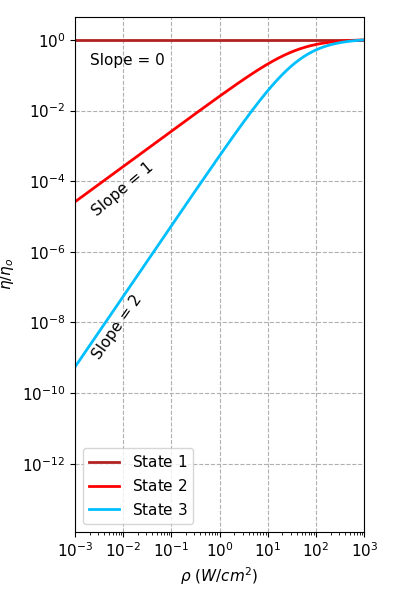

In [368]:
power = np.logspace(-5, 3, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(4, 6))

ax.plot(power, iQY(power, lv=1) / max(iQY(power, lv=1)), color='firebrick', lw=2, label='State $1$')
ax.text(2e-3, 2e-1, 'Slope = 0', rotation=0)

ax.plot(power, iQY(power, lv=2) / max(iQY(power, lv=2)), color='red', lw=2, label='State $2$')
ax.text(2e-3, 1e-5, 'Slope = 1', rotation=40)

ax.plot(power, iQY(power, lv=3) / max(iQY(power, lv=3)), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 9e-10, 'Slope = 2', rotation=55)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('$\eta / \eta_o$')
ax.set_xlim([1e-3, 10**3])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [358]:
# Model with intermidiate states
def Nb(rho):
    return(Ns * rho / (rho + Rb / alpha))

def Na(rho):
    return(Ns - Nb(rho))

def N0r(rho):
    n0 = N0 - (N1(rho) + N1i(rho) + N2(rho) + N2i(rho) + N3(rho))
    return n0

def N1(rho):
    n1 = W0 * N0 * Nb(rho) / (R1 + 1e3)
    return(n1)

def N1i(rho):
    n1i = N1(rho) * 1e3 / (W1 * Nb(rho) + R1)
    return(n1i)

def N2(rho):
    n2 = W1 * N1i(rho) * Nb(rho) / (R2 + 1e3)
    return n2

def N2i(rho):
    n2i = N2(rho) * 1e3 / (W2 * Nb(rho) + R2)
    return n2i

def N3(rho):
    n3 = W2 * N2i(rho) * Nb(rho) / R3
    return(n3)

<IPython.core.display.Javascript object>


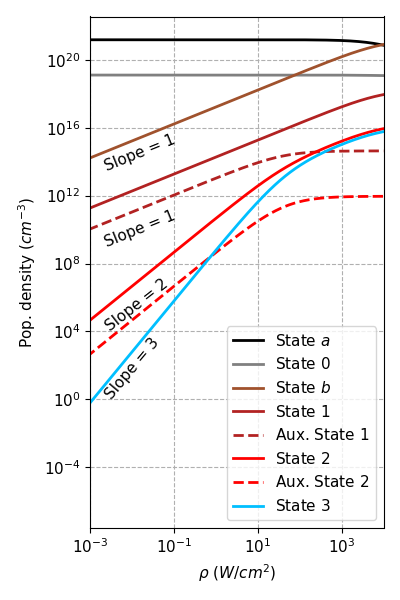

In [362]:
power = np.logspace(-5, 4, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(4, 6))

ax.plot(power, Na(power), color='k', lw=2, label='State $a$')
# ax.plot([1e-5, 10**4], [N0, N0], color='gray', lw=2, label='State $0$')
ax.plot(power, N0r(power), color='gray', lw=2, label='State $0$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.loglog(power, Nb(power), color='sienna', lw=2, label='State $b$')
ax.text(2e-3, 3e13, 'Slope = 1', rotation=22)

ax.loglog(power, N1(power), color='firebrick', lw=2, label='State $1$')
ax.loglog(power, N1i(power), ls='--', color='firebrick', lw=2, label='Aux. State $1$')
ax.text(2e-3, 1e9, 'Slope = 1', rotation=22)

ax.loglog(power, N2(power), color='red', lw=2, label='State $2$')
ax.loglog(power, N2i(power), ls='--', color='red', lw=2, label='Aux. State $2$')
ax.text(2e-3, 1e4, 'Slope = 2', rotation=38)

ax.loglog(power, N3(power), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 1, 'Slope = 3', rotation=50)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('Pop. density $(cm^{-3})$')
ax.set_xlim([1e-3, 10**4])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [569]:
# Model simple including fourth level
R4 = 1 / 500e-6
W3 = 1e-16
R2 = 1e4
W2 = 1e-15
R1 = 1e4
W1 = 1e-18
W0 = 1e-19

def Nb(rho):
    return(Ns * rho / (rho + Rb / alpha))

def Na(rho):
    return(Ns - Nb(rho))

def N1(rho):
    n1 = N0 * W0 * Nb(rho) / (W1 * Nb(rho) + R1)
    return n1

def N2(rho):
    n2 = N1(rho) * W1 * Nb(rho) / (W2 * Nb(rho) + R2)
    return n2
    
def N3(rho):
    n3 = N2(rho) * W2 * Nb(rho) / (W3 * Nb(rho) + R3)
    return n3

def N4(rho):
    n4 = W3 * Nb(rho) * N3(rho) / R4
    return n4

<IPython.core.display.Javascript object>


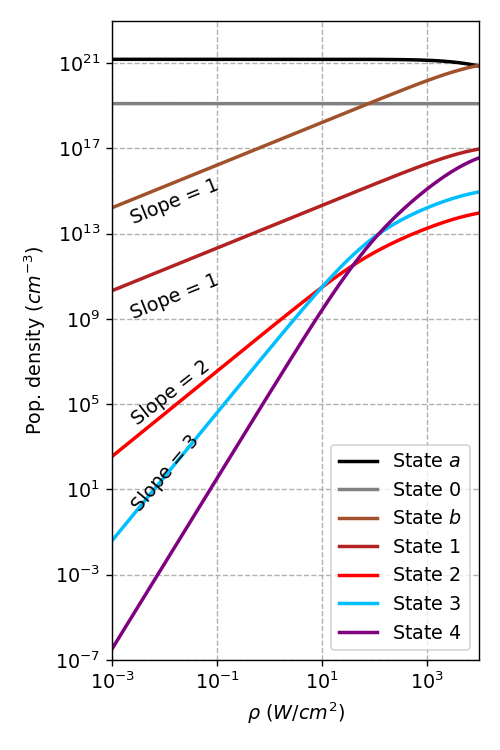

In [570]:
power = np.logspace(-5, 5, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(4, 6))

ax.plot(power, Na(power), color='k', lw=2, label='State $a$')
# ax.plot([1e-5, 10**4], [N0, N0], color='gray', lw=2, label='State $0$')
ax.plot(power, N0r(power), color='gray', lw=2, label='State $0$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.loglog(power, Nb(power), color='sienna', lw=2, label='State $b$')
ax.text(2e-3, 3e13, 'Slope = 1', rotation=22)

ax.loglog(power, N1(power), color='firebrick', lw=2, label='State $1$')
# ax.loglog(power, N1i(power), ls='--', color='firebrick', lw=2, label='Aux. State $1$')
ax.text(2e-3, 1e9, 'Slope = 1', rotation=22)

ax.loglog(power, N2(power), color='red', lw=2, label='State $2$')
# ax.loglog(power, N2i(power), ls='--', color='red', lw=2, label='Aux. State $2$')
ax.text(2e-3, 1e4, 'Slope = 2', rotation=38)

ax.loglog(power, N3(power), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 1, 'Slope = 3', rotation=50)

ax.loglog(power, N4(power), color='purple', lw=2, label='State $4$')
# ax.text(2e-3, 1, 'Slope = 4', rotation=60)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('Pop. density $(cm^{-3})$')
ax.set_xlim([1e-3, 10**4])
ax.set_ylim([1e-7, 1e23])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [571]:
def iQY(rho, lv):
    Ni = [N1, N2, N3, N4]
    i = lv - 1
    qy = Ni[i](rho) / (alpha * rho * (Ns - Nb(rho)))
    return qy

<IPython.core.display.Javascript object>


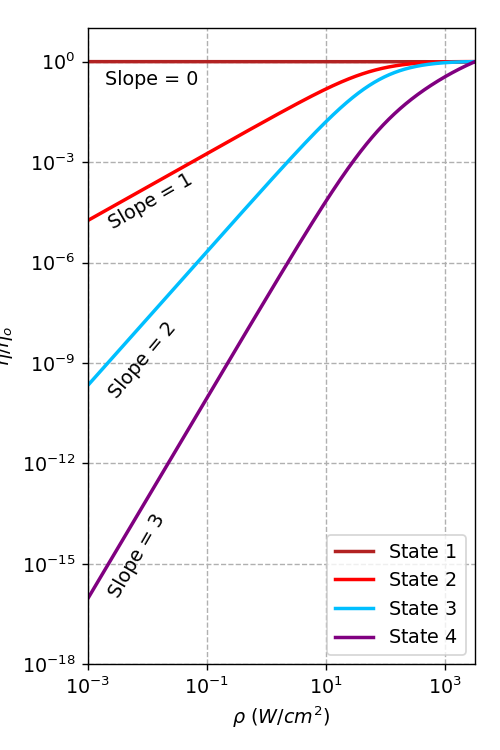

In [572]:
power = np.logspace(-5, 3.5, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(4, 6))

ax.plot(power, iQY(power, lv=1) / max(iQY(power, lv=1)), color='firebrick', lw=2, label='State $1$')
ax.text(2e-3, 2e-1, 'Slope = 0', rotation=0)

ax.plot(power, iQY(power, lv=2) / max(iQY(power, lv=2)), color='red', lw=2, label='State $2$')
ax.text(2e-3, 1e-5, 'Slope = 1', rotation=30)

ax.plot(power, iQY(power, lv=3) / max(iQY(power, lv=3)), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 9e-11, 'Slope = 2', rotation=50)

ax.plot(power, iQY(power, lv=4) / max(iQY(power, lv=4)), color='purple', lw=2, label='State $4$')
ax.text(2e-3, 1e-16, 'Slope = 3', rotation=60)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('$\eta / \eta_o$')
ax.set_xlim([1e-3, 10**3.5])
ax.set_ylim([1e-18, 10])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [567]:
pl.tight_layout()

In [573]:
R1 * Rb /(alpha * Ns * W1)

59542.35603100877

In [574]:
R2 * Rb /(alpha * Ns * W2)

59.54235603100877

In [575]:
R3 * Rb /(alpha * Ns * W3)

88.21089782371668

In [553]:
W1

1e-15

In [333]:
W2

7.442794503876097e-14

In [206]:
R1

83333.33333333333

In [207]:
R2

500000.0

In [217]:
rhoi(1)

100.0

In [2]:
from scipy import constants

In [18]:
# Liu 2013 slide 194
s = 1.69e-20
na = 1.25e19
ns = 1.52e21

tb = 1.32e-3
rb = 1/tb

t2 = 1.49e-3
r2 = 1/t2
# t3 = 0.67e-3
# r3 = 1/t3
t1 = 7.43e-3
r1 = 1/t1

w1 = 6.2e-16
w2 = 1.6e-18

l = 976e-9
nu = constants.c / l

a = s / (constants.h * nu)


rho1 = rb * r1 / (w1 * a * ns)
rho2 = rb * r2 / (w2 * a * ns)

In [19]:
rho1

1.3029933152934055

In [20]:
rho2

2517.7722341571316

## ETU3

In [40]:
%matplotlib notebook
import matplotlib.pyplot as pl
import numpy as np
from scipy import constants

In [162]:
# Bergstrand 2019
s = 1.5e-20
N0 = 1.5e20
Ns = 1.5e21

tb = 1.32e-3
Rb = 1/tb

t2 = 1.32e-3
R2 = 1/t2
t3 = 0.2e-3
R3 = 1/t3
t1 = 7.43e-3
R1 = 1/t1

W0 = 1.6e-18
W1 = 2.105e-17 # my paper
W2 = 1.6e-18

l = 976e-9
nu = constants.c / l

alpha = s / (constants.h * nu)


rho1 = Rb * R1 / (W1 * alpha * Ns)
rho2 = Rb * R2 / (W2 * alpha * Ns)

In [163]:
rho1

43.81567952624827

In [164]:
rho2

3244.714962795701

In [165]:
Rb / alpha

10279.25700213678

In [166]:
def Nb(rho):
    return(Ns * rho / (rho + Rb / alpha))

def Na(rho):
    return(Ns - Nb(rho))

def N0r(rho):
    n0 = N0 - (N1(rho) + N2(rho) + N3(rho))
    return n0

def N1(rho):
    n1 = N0 * W0 * Nb(rho) / (W1 * Nb(rho) + R1)
    return n1

def N2(rho):
    n2 = N1(rho) * W1 * Nb(rho) / (W2 * Nb(rho) + R2)
    return n2
    
def N3(rho):
    n3 = N2(rho) * W2 * Nb(rho) / R3
    return n3

def iQY(rho, lv):
    Ni = [N1, N2, N3]
    i = lv - 1
    qy = Ni[i](rho) / (alpha * rho * (Ns - Nb(rho)))
    return qy

def iQY(rho, lv):
    Ni = [N1, N2, N3]
    i = lv - 1
    qy = Ni[i](rho) / (alpha * rho * Ns)
    return qy

<IPython.core.display.Javascript object>


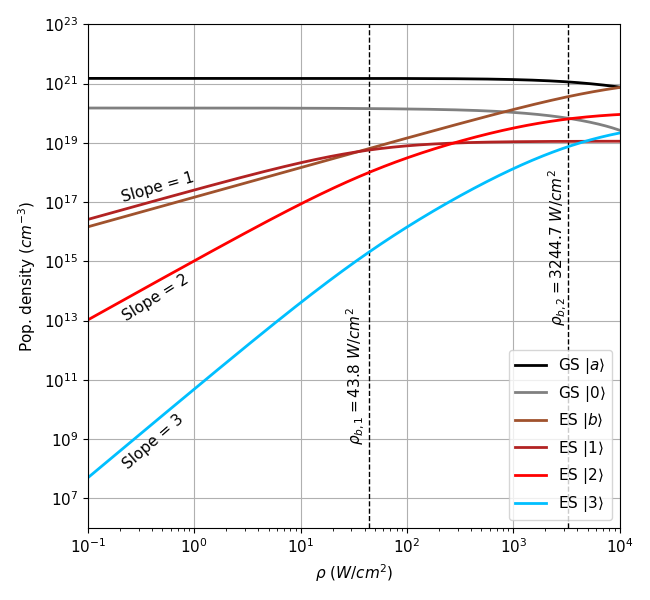

In [167]:
power = np.logspace(-5, 5, 1000)

labelPos = 2e-1

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(6.5, 6))

ax.plot([rho1, rho1], [1e6, 1e23], 'k--', lw=1)
ax.text(rho1 - 18, 1e9, r'$\rho_{b,1} = $' + f'{rho1:.1f}' + r' $W/cm^2$', rotation=90)

ax.plot([rho2, rho2], [1e6, 1e23], 'k--', lw=1)
ax.text(rho2 - 1200, 1e13, r'$\rho_{b,2} = $' + f'{rho2:.1f}' + r' $W/cm^2$', rotation=90)


ax.plot(power, Na(power), color='k', lw=2, label=r'GS $\vert a \rangle$')
# ax.plot([1e-5, 10**4], [N0, N0], color='gray', lw=2, label='State $0$')
ax.plot(power, N0r(power), color='gray', lw=2, label=r'GS $\vert 0 \rangle$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.loglog(power, Nb(power), color='sienna', lw=2, label=r'ES $\vert b \rangle$')
ax.text(labelPos, 1e17, r'Slope = 1', rotation=16)

ax.loglog(power, N1(power), color='firebrick', lw=2, label=r'ES $\vert 1 \rangle$')
# ax.loglog(power, N1i(power), ls='--', color='firebrick', lw=2, label='Aux. State $1$')
# ax.text(labelPos, 1e9, 'Slope = 1', rotation=22)

ax.loglog(power, N2(power), color='red', lw=2, label=r'ES $\vert 2 \rangle$')
# ax.loglog(power, N2i(power), ls='--', color='red', lw=2, label='Aux. State $2$')
ax.text(labelPos, 1e13, 'Slope = 2', rotation=32)

ax.loglog(power, N3(power), color='deepskyblue', lw=2, label=r'ES $\vert 3 \rangle$')
ax.text(labelPos, 1e8, 'Slope = 3', rotation=41)

ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('Pop. density $(cm^{-3})$')
ax.set_xlim([1e-1, 10**4])
ax.set_ylim([1e6, 1e23])

ax.grid(linestyle='-', linewidth=0.8)
ax.legend()
pl.tight_layout()

<IPython.core.display.Javascript object>


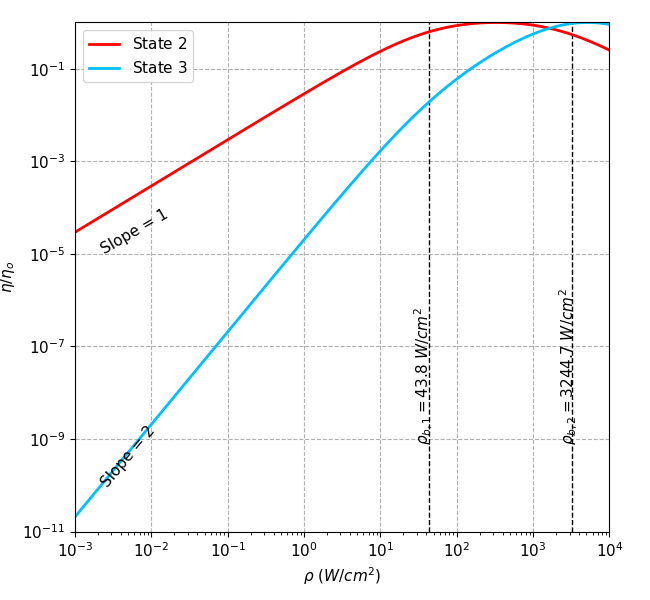

In [176]:
power = np.logspace(-5, 3.5, 1000)
power = np.logspace(-5, 4, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(6.5, 6))

ax.plot([rho1, rho1], [1e-11, 1e1], 'k--', lw=1)
ax.text(rho1 - 18, 1e-9, r'$\rho_{b,1} = $' + f'{rho1:.1f}' + r' $W/cm^2$', rotation=90)

ax.plot([rho2, rho2], [1e-11, 1e1], 'k--', lw=1)
ax.text(rho2 - 1200, 1e-9, r'$\rho_{b,2} = $' + f'{rho2:.1f}' + r' $W/cm^2$', rotation=90)


# ax.plot(power, iQY(power, lv=1), color='firebrick', lw=2, label='State $1$')
# ax.plot(power, iQY(power, lv=1) / max(iQY(power, lv=1)), color='firebrick', lw=2, label='State $1$')
# ax.text(2e-3, 2e-1, 'Slope = 0', rotation=0)

# ax.plot(power, iQY(power, lv=2), color='red', lw=2, label='State $2$')
ax.plot(power, iQY(power, lv=2) / max(iQY(power, lv=2)), color='red', lw=2, label='State $2$')
ax.text(2e-3, 1e-5, 'Slope = 1', rotation=30)

# ax.plot(power, iQY(power, lv=3), color='deepskyblue', lw=2, label='State $3$')
ax.plot(power, iQY(power, lv=3) / max(iQY(power, lv=3)), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 9e-11, 'Slope = 2', rotation=50)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('$\eta / \eta_o$')
ax.set_xlim([1e-3, 10**4])
ax.set_ylim([1e-11, 1])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()

In [152]:
# Bergstrand 2019
s = 1.5e-21
N0 = 1.5e20
Ns = 1.5e21

tb = 1.32e-3
Rb = 1/tb

t2 = 1.32e-3
R2 = 1/t2
t3 = 0.2e-3
R3 = 1/t3
t1 = 7.43e-3
R1 = 1/t1

W0 = 1.6e-18
W1 = 2.11e-19 # my paper
W2 = 1.6e-15

l = 976e-9
nu = constants.c / l

alpha = s / (constants.h * nu)


rho1 = Rb * R1 / (W1 * alpha * Ns)
rho2 = Rb * R2 / (W2 * alpha * Ns)

In [153]:
rho1

43711.850901778496

In [147]:
rho2

32.44714962795702

In [148]:
Rb / alpha

102792.5700213678

<IPython.core.display.Javascript object>


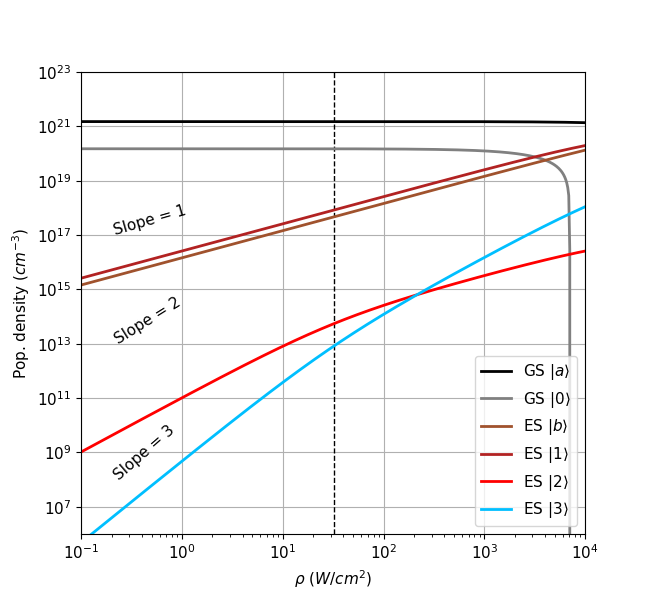

C:\Users\jean.matias\AppData\Local\Temp\ipykernel_10632\728351534.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


In [154]:
power = np.logspace(-5, 5, 1000)

labelPos = 2e-1

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(6.5, 6))

ax.plot([rho1, rho1], [1e6, 1e23], 'k--', lw=1)
ax.text(rho1 - 18, 1e9, r'$\rho_{b,1} = $' + f'{rho1:.1f}' + r' $W/cm^2$', rotation=90)

ax.plot([rho2, rho2], [1e6, 1e23], 'k--', lw=1)
ax.text(rho2 - 1200, 1e13, r'$\rho_{b,2} = $' + f'{rho2:.1f}' + r' $W/cm^2$', rotation=90)


ax.plot(power, Na(power), color='k', lw=2, label=r'GS $\vert a \rangle$')
# ax.plot([1e-5, 10**4], [N0, N0], color='gray', lw=2, label='State $0$')
ax.plot(power, N0r(power), color='gray', lw=2, label=r'GS $\vert 0 \rangle$')

# ax.plot(power, Nb_(power), color='cyan', lw=2, label='Approx State $b$')
ax.loglog(power, Nb(power), color='sienna', lw=2, label=r'ES $\vert b \rangle$')
ax.text(labelPos, 1e17, r'Slope = 1', rotation=16)

ax.loglog(power, N1(power), color='firebrick', lw=2, label=r'ES $\vert 1 \rangle$')
# ax.loglog(power, N1i(power), ls='--', color='firebrick', lw=2, label='Aux. State $1$')
# ax.text(labelPos, 1e9, 'Slope = 1', rotation=22)

ax.loglog(power, N2(power), color='red', lw=2, label=r'ES $\vert 2 \rangle$')
# ax.loglog(power, N2i(power), ls='--', color='red', lw=2, label='Aux. State $2$')
ax.text(labelPos, 1e13, 'Slope = 2', rotation=32)

ax.loglog(power, N3(power), color='deepskyblue', lw=2, label=r'ES $\vert 3 \rangle$')
ax.text(labelPos, 1e8, 'Slope = 3', rotation=41)

ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('Pop. density $(cm^{-3})$')
ax.set_xlim([1e-1, 10**4])
ax.set_ylim([1e6, 1e23])

ax.grid(linestyle='-', linewidth=0.8)
ax.legend()
pl.tight_layout()

<IPython.core.display.Javascript object>


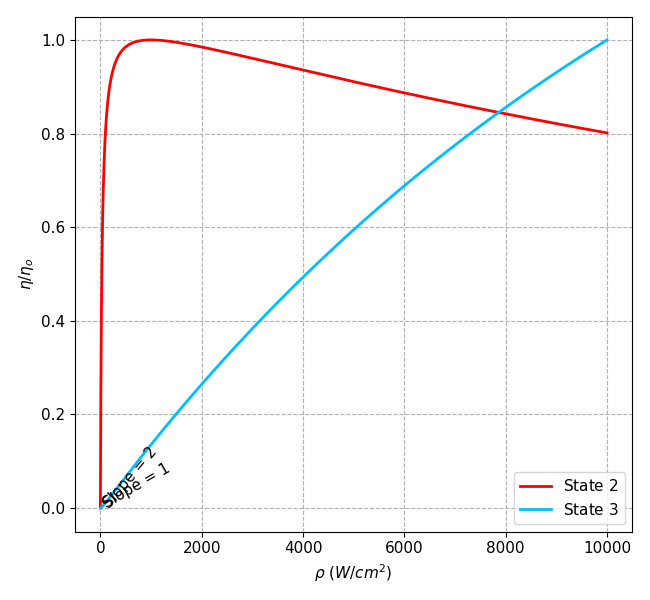

In [155]:
power = np.logspace(-5, 3.5, 1000)
power = np.logspace(-5, 4, 1000)

pl.rcParams.update({'font.size': 11})
fig, ax = pl.subplots(figsize=(6.5, 6))

# ax.plot(power, iQY(power, lv=1), color='firebrick', lw=2, label='State $1$')
# ax.plot(power, iQY(power, lv=1) / max(iQY(power, lv=1)), color='firebrick', lw=2, label='State $1$')
# ax.text(2e-3, 2e-1, 'Slope = 0', rotation=0)

# ax.plot(power, iQY(power, lv=2), color='red', lw=2, label='State $2$')
ax.plot(power, iQY(power, lv=2) / max(iQY(power, lv=2)), color='red', lw=2, label='State $2$')
ax.text(2e-3, 1e-5, 'Slope = 1', rotation=30)

# ax.plot(power, iQY(power, lv=3), color='deepskyblue', lw=2, label='State $3$')
ax.plot(power, iQY(power, lv=3) / max(iQY(power, lv=3)), color='deepskyblue', lw=2, label='State $3$')
ax.text(2e-3, 9e-11, 'Slope = 2', rotation=50)


ax.set_xlabel(r'$\rho$ $(W/cm^2)$')
ax.set_ylabel('$\eta / \eta_o$')
# ax.set_xlim([1e-3, 10**3.5])
# ax.set_ylim([1e-18, 1])

ax.grid(linestyle='--', linewidth=0.8)
ax.legend()
pl.tight_layout()